# INSURANCE PREMIUM ANALYTICS

## Introduction

#### Welcome to the Insurance Premium Prediction Project, where data meets insight in the world of insurance. In this comprehensive analysis,<br>we delve into the intricate factors influencing insurance premiums, leveraging the Insurance Premium Prediction dataset.



### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/insurance-premium-prediction-analysis/insurance_dataset.csv')

## Exploratory Data Analysis
#### Missing Values Treatment
#### Outlier Treatment

In [3]:
df.head()

,age,gender,marital_status,occupation,education,income,location,driving_history,vehicle_type,vehicle_age,vehicle_value,coverage_type,num_claims,claim_amount,policy_duration,driving_experience,premium
0,52.189202,Female,Single,Retired,Bachelor,9807.305793,Rural,Clean,Sports Car,4.829941,6326.954867,Standard,1.0,706.162366,4.889829,29.251777,3.301989e+05
1,43.118616,Male,Single,Professional,PhD,4519.972197,Suburban,Accidents,Sports Car,4.558468,4456.340715,Basic,1.0,536.647560,3.853577,15.828655,1.921522e+05
2,21.855357,Female,Divorced,Student,PhD,63766.845580,NaN,Clean,Sedan,3.159116,9236.438040,Premium,NaN,457.182907,1.409472,20.605316,2.018658e+05
3,43.358136,Female,Divorced,Retired,PhD,73165.859503,Urban,Clean,Sports Car,17.341562,34596.057856,Premium,0.0,385.741987,1.686120,43.517050,1.500021e+06
4,71.557150,Male,Married,Student,Master,44925.424385,Suburban,Accidents,Sports Car,14.185656,113697.036685,Basic,0.0,6930.442654,1.002890,48.312220,8.135836e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 95015 non-null  float64
 1   gender              95099 non-null  object 
 2   marital_status      95024 non-null  object 
 3   occupation          95008 non-null  object 
 4   education           94929 non-null  object 
 5   income              95083 non-null  float64
 6   location            95009 non-null  object 
 7   driving_history     94975 non-null  object 
 8   vehicle_type        94933 non-null  object 
 9   vehicle_age         95033 non-null  float64
 10  vehicle_value       95018 non-null  float64
 11  coverage_type       95111 non-null  object 
 12  num_claims          95035 non-null  float64
 13  claim_amount        94975 non-null  float64
 14  policy_duration     94945 non-null  float64
 15  driving_experience  95054 non-null  float64
 16  pre

In [5]:
df.describe()

,age,income,vehicle_age,vehicle_value,num_claims,claim_amount,policy_duration,driving_experience,premium
count,95015.000000,9.508300e+04,95033.000000,9.501800e+04,95035.000000,94975.000000,94945.000000,95054.000000,9.029400e+04
mean,39.928290,8.300036e+04,10.028145,3.298546e+04,0.993834,827.144846,3.005386,24.993183,1.316627e+06
std,15.068415,1.095115e+05,5.758922,4.310528e+04,0.995583,1073.956934,1.157368,14.398739,1.922034e+06
min,-25.567568,5.205407e+02,0.000044,1.351945e+02,0.000000,3.686504,1.000006,0.000548,-3.891967e+06
25%,29.745540,2.538453e+04,5.057874,1.018489e+04,0.000000,255.894487,2.002297,12.580066,3.504382e+05
50%,39.923132,4.989692e+04,10.033641,1.995300e+04,1.000000,503.031142,3.005506,24.963787,7.429924e+05
75%,50.076332,9.872632e+04,15.020096,3.937242e+04,2.000000,983.914885,4.013982,37.449825,1.537740e+06
max,104.938113,4.339129e+06,19.999743,1.255972e+06,7.000000,33259.439089,4.999968,49.998755,8.071888e+07


In [6]:
df.describe(include='object')

,gender,marital_status,occupation,education,location,driving_history,vehicle_type,coverage_type
count,95099,95024,95008,94929,95009,94975,94933,95111
unique,2,3,4,4,3,3,4,3
top,Female,Single,Blue Collar,Bachelor,Urban,Accidents,SUV,Premium
freq,47669,31748,23999,23820,31719,31664,23951,31798


In [7]:
df.isnull().sum()

age                   4985
gender                4901
marital_status        4976
occupation            4992
education             5071
income                4917
location              4991
driving_history       5025
vehicle_type          5067
vehicle_age           4967
vehicle_value         4982
coverage_type         4889
num_claims            4965
claim_amount          5025
policy_duration       5055
driving_experience    4946
premium               9706
dtype: int64

### Missing Value Treatment

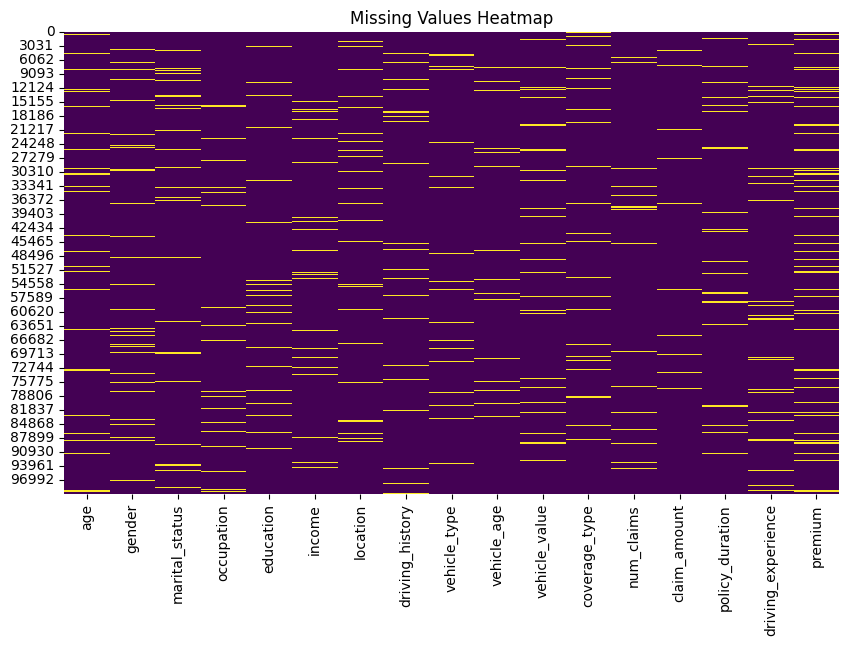

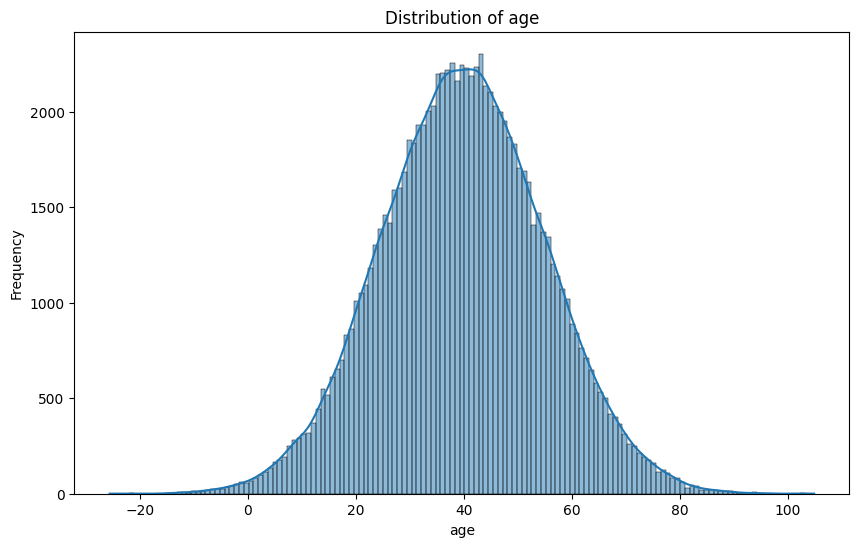

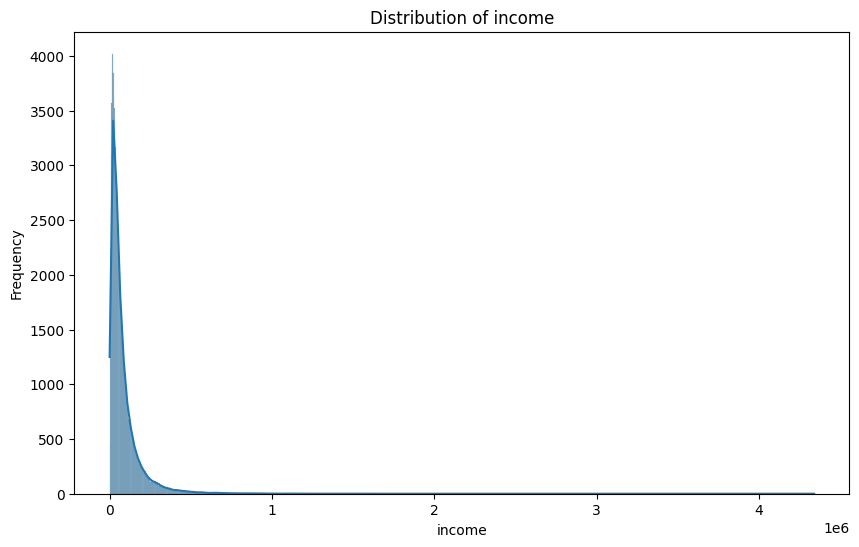

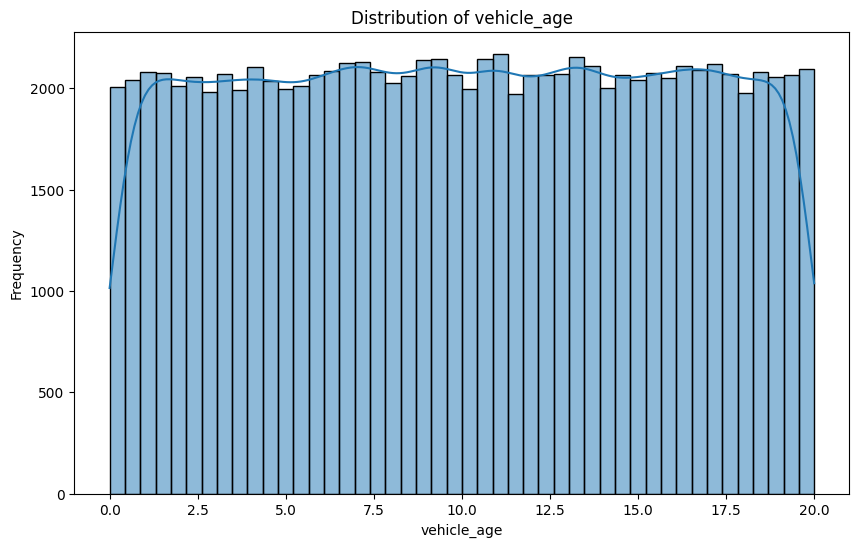

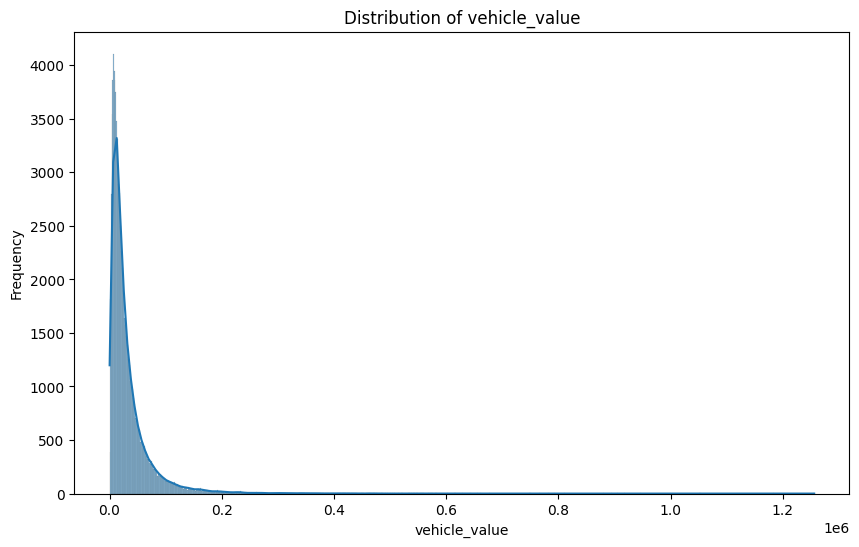

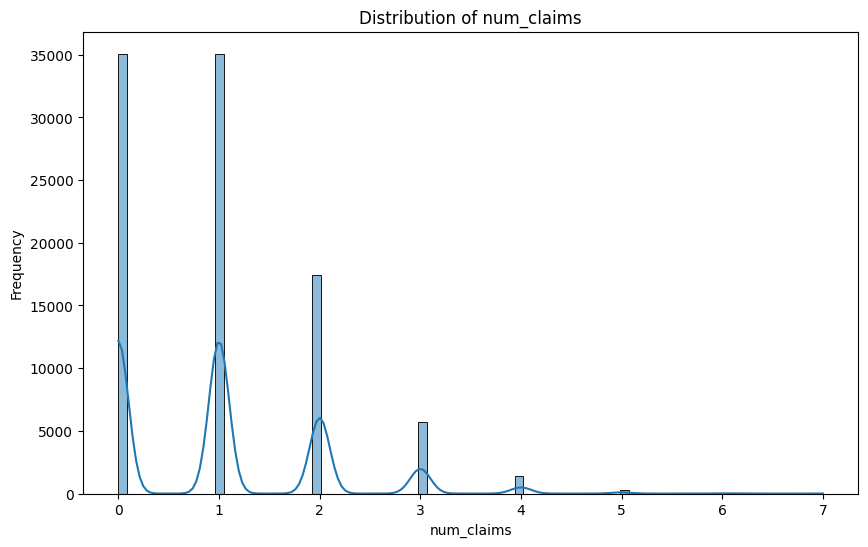

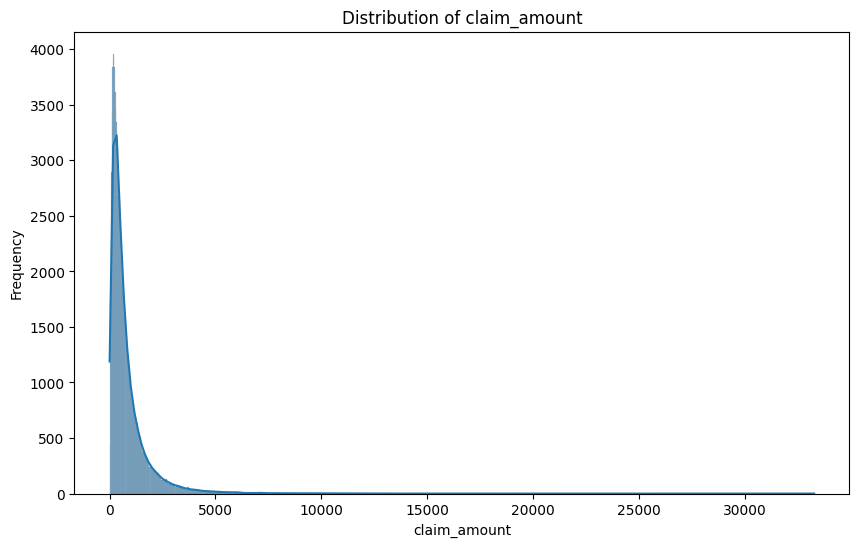

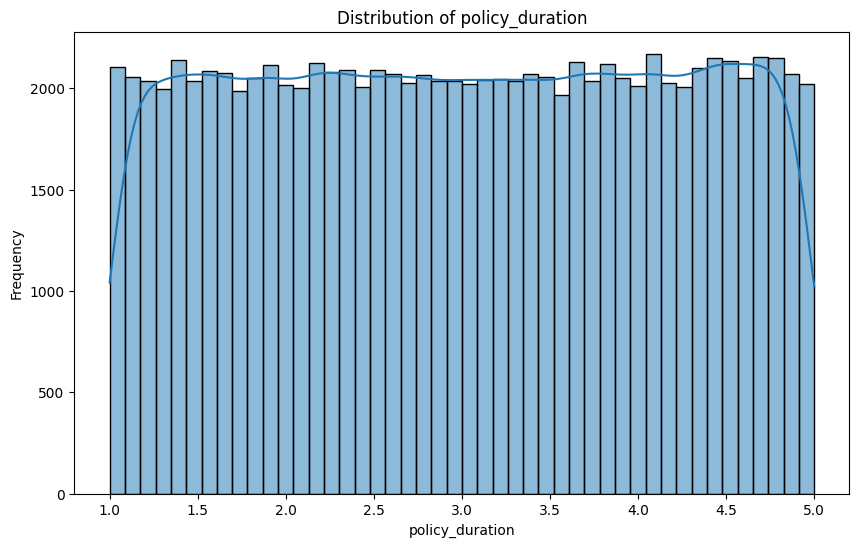

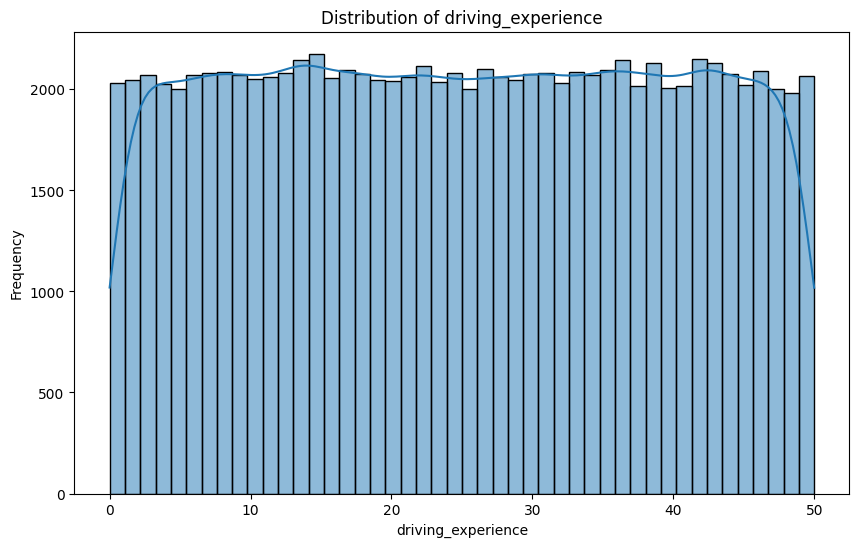

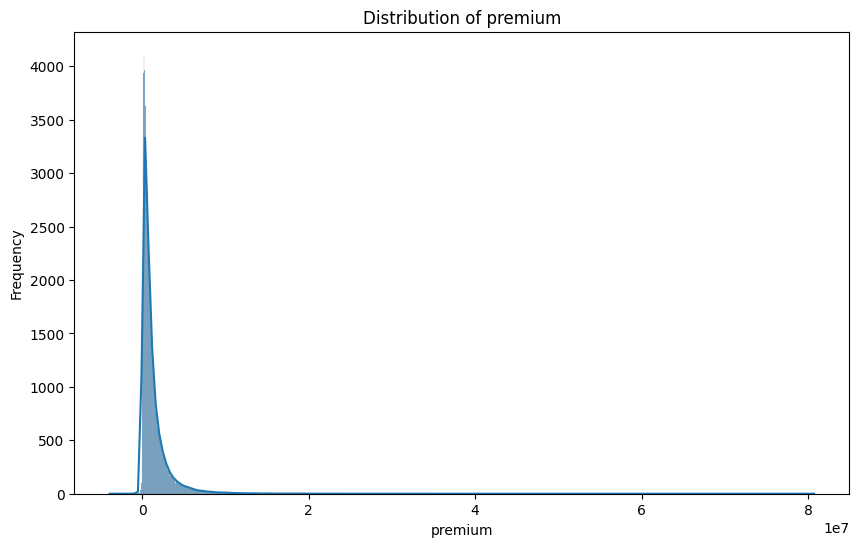

In [8]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize distributions
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# Check for NaN values before outlier detection
print("NaN values in numerical columns:\n") 
df.isnull().sum()

NaN values in numerical columns:



age                   4985
gender                4901
marital_status        4976
occupation            4992
education             5071
income                4917
location              4991
driving_history       5025
vehicle_type          5067
vehicle_age           4967
vehicle_value         4982
coverage_type         4889
num_claims            4965
claim_amount          5025
policy_duration       5055
driving_experience    4946
premium               9706
dtype: int64

In [10]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [11]:
# Fill NaN values only for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

### Outlier detection and Treatment

In [12]:
# Outlier detection using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

In [13]:
# Check if df_cleaned is empty after removing outliers
if df_cleaned.empty:
    print("Warning: df_cleaned is empty after outlier removal.")
else:
    print(f"Rows remaining after outlier removal: {df_cleaned.shape[0]}")
    # Missing Value Treatment
    if 'marital_status' in df_cleaned.columns:
        print("Marital Status Column:\n", df_cleaned['marital_status'].head())  # Debugging output
        mode_marital = df_cleaned['marital_status'].mode()
        print("Mode of marital_status:", mode_marital)  # Debugging output
        if not mode_marital.empty:
            df_cleaned['marital_status'].fillna(mode_marital[0], inplace=True)
        else:
            print("No mode found for 'marital_status'.")

    # Check the cleaned DataFrame
    print("Cleaned DataFrame info:\n", df_cleaned.info())

# List of numerical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns:")
numerical_cols

Rows remaining after outlier removal: 68816
Marital Status Column:
 0      Single
1      Single
2    Divorced
3    Divorced
5     Married
Name: marital_status, dtype: object
Mode of marital_status: 0    Divorced
Name: marital_status, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 68816 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 68816 non-null  float64
 1   gender              65434 non-null  object 
 2   marital_status      68816 non-null  object 
 3   occupation          65386 non-null  object 
 4   education           65353 non-null  object 
 5   income              68816 non-null  float64
 6   location            65408 non-null  object 
 7   driving_history     65288 non-null  object 
 8   vehicle_type        65351 non-null  object 
 9   vehicle_age         68816 non-null  float64
 10  vehicle_value       68816 non-null  float64
 11  covera

['age',
 'income',
 'vehicle_age',
 'vehicle_value',
 'num_claims',
 'claim_amount',
 'policy_duration',
 'driving_experience',
 'premium']

In [14]:
# Define categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Handle missing values in remaining categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:  # Check for missing values
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)

# Check the DataFrame after filling missing values in categorical columns
print("DataFrame after handling missing values in categorical columns:")
df.info()

DataFrame after handling missing values in categorical columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 100000 non-null  float64
 1   gender              100000 non-null  object 
 2   marital_status      100000 non-null  object 
 3   occupation          100000 non-null  object 
 4   education           100000 non-null  object 
 5   income              100000 non-null  float64
 6   location            100000 non-null  object 
 7   driving_history     100000 non-null  object 
 8   vehicle_type        100000 non-null  object 
 9   vehicle_age         100000 non-null  float64
 10  vehicle_value       100000 non-null  float64
 11  coverage_type       100000 non-null  object 
 12  num_claims          100000 non-null  float64
 13  claim_amount        100000 non-null  float64
 14  policy_duration     1

In [15]:
# Re-evaluate outlier detection
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers again
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Check if df_cleaned is empty after removing outliers
if df_cleaned.empty:
    print("Warning: df_cleaned is empty after outlier removal.")
else:
    print(f"Rows remaining after outlier removal: {df_cleaned.shape[0]}")
    print("Cleaned DataFrame info after outlier removal:")
    print(df_cleaned.info())

# List of numerical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns:")
numerical_cols

Rows remaining after outlier removal: 68816
Cleaned DataFrame info after outlier removal:
<class 'pandas.core.frame.DataFrame'>
Index: 68816 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 68816 non-null  float64
 1   gender              68816 non-null  object 
 2   marital_status      68816 non-null  object 
 3   occupation          68816 non-null  object 
 4   education           68816 non-null  object 
 5   income              68816 non-null  float64
 6   location            68816 non-null  object 
 7   driving_history     68816 non-null  object 
 8   vehicle_type        68816 non-null  object 
 9   vehicle_age         68816 non-null  float64
 10  vehicle_value       68816 non-null  float64
 11  coverage_type       68816 non-null  object 
 12  num_claims          68816 non-null  float64
 13  claim_amount        68816 non-null  float64
 14  policy_duration  

['age',
 'income',
 'vehicle_age',
 'vehicle_value',
 'num_claims',
 'claim_amount',
 'policy_duration',
 'driving_experience',
 'premium']

In [16]:
# Check column names in df_cleaned
print("Columns in df_cleaned:", df_cleaned.columns.tolist())

# Define numerical and categorical columns
numerical_cols = ['age', 'income', 'vehicle_age', 'vehicle_value', 'num_claims', 'claim_amount', 'policy_duration', 'driving_experience']
categorical_cols = ['gender', 'marital_status', 'occupation', 'education', 'location', 'driving_history', 'vehicle_type', 'coverage_type']

# Check the defined columns
print("Numerical Columns:", numerical_cols,'\n')
print("Categorical Columns:", categorical_cols)

Columns in df_cleaned: ['age', 'gender', 'marital_status', 'occupation', 'education', 'income', 'location', 'driving_history', 'vehicle_type', 'vehicle_age', 'vehicle_value', 'coverage_type', 'num_claims', 'claim_amount', 'policy_duration', 'driving_experience', 'premium']
Numerical Columns: ['age', 'income', 'vehicle_age', 'vehicle_value', 'num_claims', 'claim_amount', 'policy_duration', 'driving_experience'] 

Categorical Columns: ['gender', 'marital_status', 'occupation', 'education', 'location', 'driving_history', 'vehicle_type', 'coverage_type']


#### Mean Imputation and One-Hot key Encoding


In [17]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scaling will be applied after train-test split
    ('regressor', LinearRegression())
])

------------

------------

## Fitting Base Model
#### Using Linear Regression from Scikit-Learn

In [18]:
# Train-Test Split
X = df_cleaned.drop('premium', axis=1)
y = df_cleaned['premium']

In [19]:
# Check columns in X
print("Columns in X:")
X.columns.tolist()

Columns in X:


['age',
 'gender',
 'marital_status',
 'occupation',
 'education',
 'income',
 'location',
 'driving_history',
 'vehicle_type',
 'vehicle_age',
 'vehicle_value',
 'coverage_type',
 'num_claims',
 'claim_amount',
 'policy_duration',
 'driving_experience']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Fit the model on training data
pipeline.fit(X_train, y_train)

# Predictions on train data
y_train_pred = pipeline.predict(X)
# Predictions on test data
y_test_pred = pipeline.predict(X_test)

# Evaluate the model
print("Mean Squared Error on Test Data:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score on Test Data:", r2_score(y_test, y_test_pred))

Mean Squared Error on Test Data: 72440048937.95638
R^2 Score on Test Data: 0.823676694869538


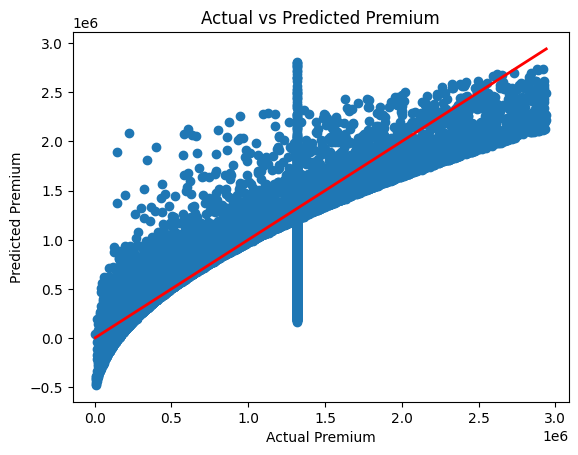

In [22]:
# Visualize Predictions vs Actual
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premium')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

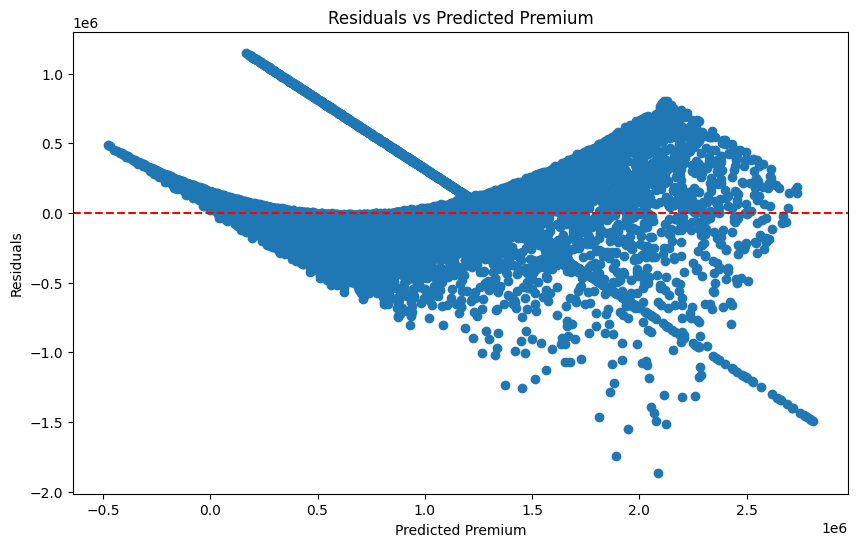

In [23]:
# Residuals
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Premium')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Premium')
plt.show()


### TEST ACCURACY
Mean Squared Error on Test Data: 72424238560.08183<br>
R^2 Score on Test Data: 0.8237151782516322

In [24]:
# feature engineering
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[numerical_cols])

# Combine with original features


X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(numerical_cols))
X_combined = pd.concat([X.reset_index(drop=True), X_poly_df], axis=1)

# Proceed with splitting the combined DataFrame


In [25]:
# Assuming X_combined is your DataFrame with the new features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [26]:
# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X_combined, drop_first=True)

# Split the data again after encoding
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [27]:
# Define the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Make predictions
y_pred = model.predict(X_test)


In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 99615.40
Mean Squared Error (MSE): 40747037762.96
R-squared (R2): 0.90


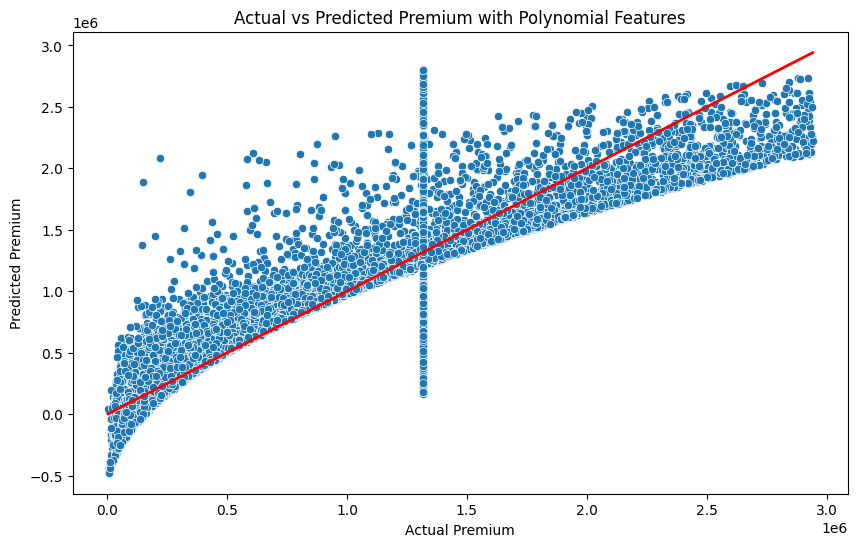

In [30]:
# Visualize the relationship between actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premium with Polynomial Features')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()


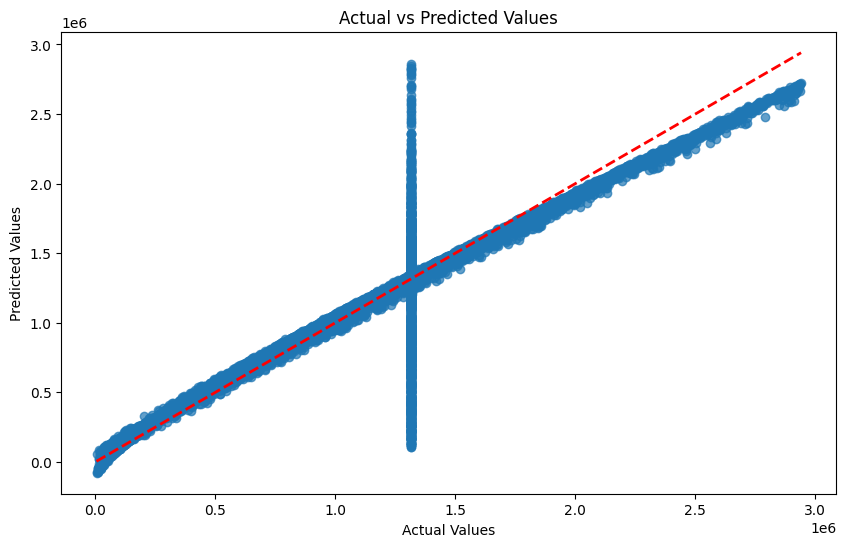

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


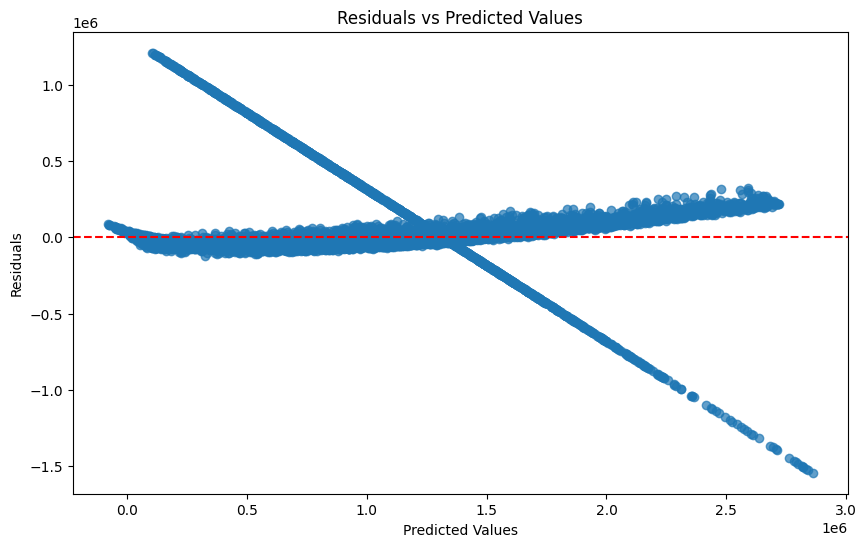

In [32]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


#### Results from PolynomialFeatures Selection
Mean Absolute Error (MAE): 99616.29<br>
Mean Squared Error (MSE): 40747021473.73<br>
R-squared (R2): 0.90

---

---

## Hyperparameter tuning
#### Since polynomial features selection can cause potential overfitting, we perform hyperparameter tuning to generalize
#### the model performance as to ensure the model fits balanced to any untrained data

In [ ]:
# Define the model
model = LinearRegression()

# Define the parameter grid (remove 'normalize')
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

# Set up Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Optional: Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### Results from GridSearchCV (Hyperparameter Tuning) 
Mean Absolute Error (MAE): 99616.29299393036<br>
Mean Squared Error (MSE): 40747021473.73016<br>
R-squared (R²): 0.9008193726287577

--------------

---------

## Cross validation
#### The score from Polynomial Features selection and Hyperparameter tuning gives 90% whereas
#### Base model gives ~82% suggests potential overfitting, so performing cross validation to validate the effectiveness of the tuning process


In [ ]:
X_combined = X_combined.loc[:, ~X_combined.columns.duplicated()]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['gender', 'marital_status', 'occupation', 'education', 'location']
numeric_features = ['age', 'income', 'vehicle_age', 'vehicle_value', 'num_claims', 'claim_amount', 'policy_duration', 'driving_experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [ ]:
try:
    scores = cross_val_score(pipeline, X_combined, y, cv=5, scoring='r2', error_score='raise')
    print("Cross-validated R² scores:", scores)
except ValueError as e:
    print("Error during cross-validation:", e)


In [ ]:
su=0
for i in scores:
    su+=i
    n=len(scores)
    
print('Generalized CV score',round((su/n),4))

#### Generalized CV score 0.8242, so there is potential overfitting with Polynomial Features selection and hyperparameter testing

-----

------

## Regularization
#### Refitting with Lasso to prevent Overfitting
#### Since CV score says average of 81.4 to 83%, we can do lasso to prevent overfitting

In [ ]:
from sklearn.linear_model import Lasso , Ridge

# Load your data
df = pd.read_csv('insurance_dataset.csv')

# Assuming df_cleaned is already defined and cleaned
# Check the columns in df_cleaned
print("Columns in df_cleaned:", df_cleaned.columns.tolist())

# Define numerical and categorical columns dynamically
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove 'premium' from numerical_cols if present
if 'premium' in numerical_cols:
    numerical_cols.remove('premium')

# Check the defined columns
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

In [ ]:
# Train-Test Split
X = df_cleaned.drop('premium', axis=1)
y = df_cleaned['premium']

# Check columns in X
print("Columns in X:", X.columns.tolist())

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Choose the model (Lasso or Ridge)
model = Lasso()  # or Ridge()

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
# Train-Test Split again for fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Cross-validated R² score:", best_score)

# Evaluate on the test set
test_score = best_model.score(X_test, y_test)
print("Test R² score:", test_score)

------------

------------

## Model Summary

### Best Model Selection

After evaluating multiple models, the Lasso regression model emerged as the best candidate for predicting our target variable. The following points summarize the findings:

- **Cross-Validated R² Score**: The Lasso model achieved a cross-validated R² score of approximately **0.824**. This score indicates that the model explains about **82.4%** of the variance in the target variable across different subsets of the data.
- **Test R² Score**: The model's test R² score closely matched the cross-validated score at around **0.824**, demonstrating strong generalization to unseen data and indicating that the model is not overfitting.
- **Comparison with Other Models**: While a polynomial regression model with grid search yielded a higher training R² score of **0.90**, it exhibited a significant drop in performance during cross-validation, suggesting potential overfitting. The 7% difference in scores reinforces the importance of model generalization over mere training performance.

### Model Pipeline

The final model pipeline consists of the following steps:

1. **Preprocessing**:
   - Numerical features are standardized using `StandardScaler`.
   - Categorical features are one-hot encoded using `OneHotEncoder`.

2. **Model**: 
   - Lasso regression is employed with an alpha value of **100** to introduce regularization and prevent overfitting.

## Conclusion

The Lasso regression model, with its stable performance metrics, is deemed the best fit for this analysis. Future improvements may include further hyperparameter tuning, exploring additional feature engineering techniques, or considering ensemble methods for potentially enhanced performance.